# <b style="color:aqua">Outliers</b>

## <b style="color:green">Outlier Detection Using IQR (Box Plot)</b>
- __Box Plot__ : It is a type of chart that depicts a group of numerical data through their quartiles. It is a simple way to visualize the shape of our data. It makes comparing characteristics of data between categories very easy.
- A Box Plot gives a five-number summary of a set of data which is :
  - __Minimum :__ It is the minimum value in the dataset excluding the outliers.
  - __First Quartile (Q1) :__ 25% of the data lies below the First (lower) Quartile.
  - __Median (Q2) :__ It is the mid-point of the dataset. Half of the values lie below it and half above.
  - __Third Quartile (Q3) :__ 75% of the data lies below the Third (Upper) Quartile.
  - __Maximum :__ It is the maximum value in the dataset excluding the outliers.
- \
  ![Box-Plot](../img/BoxPlot02.jpg)
- \
  ![Box-Plot](../img/BoxPlot.jpg)
- __<ins style="color:red">Note :</b>__ The box plot shown in the above diagram is a perfect plot with no skewness. The plots can have skewness and the median might not be at the center of the box.
- The area inside the box (50% of the data) is known as the Inter Quartile Range. The IQR is calculated as : `IQR = Q3 - Q1`
- __Outliers__ are the data points below and above the lower and upper limit. The lower and upper limit is calculated as :
  - Lower Limit = `Q1 - 1.5*IQR`
  - Upper Limit = `Q3 + 1.5*IQR`
  - The values below and above these limits are considered outliers and the minimum and maximum values are calculated from the points which lie under the lower and upper limit.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/placement43.csv')
df.head(4)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1


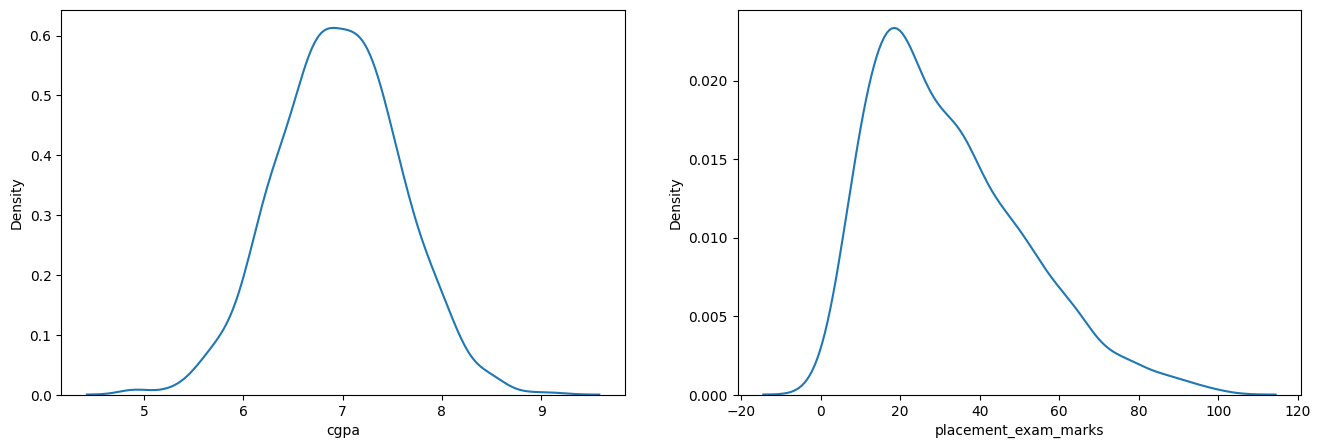

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'])

plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'])

plt.show()

In [7]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

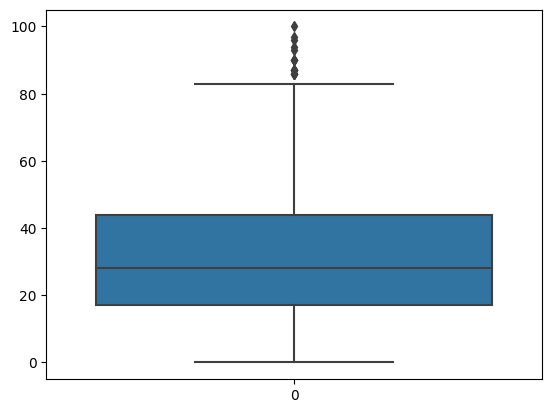

In [8]:
sns.boxplot(df['placement_exam_marks'])
plt.show()

In [10]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)
percentile25, percentile75

(17.0, 44.0)

In [11]:
iqr = percentile75 - percentile25
iqr

27.0

In [12]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


### <b style="color:red">Finding Outlier</b>

In [13]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [14]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


### <b style="color:red">Trimming</b>

In [15]:
new_df = df[df['placement_exam_marks'] < upper_limit]
new_df.shape

(985, 3)

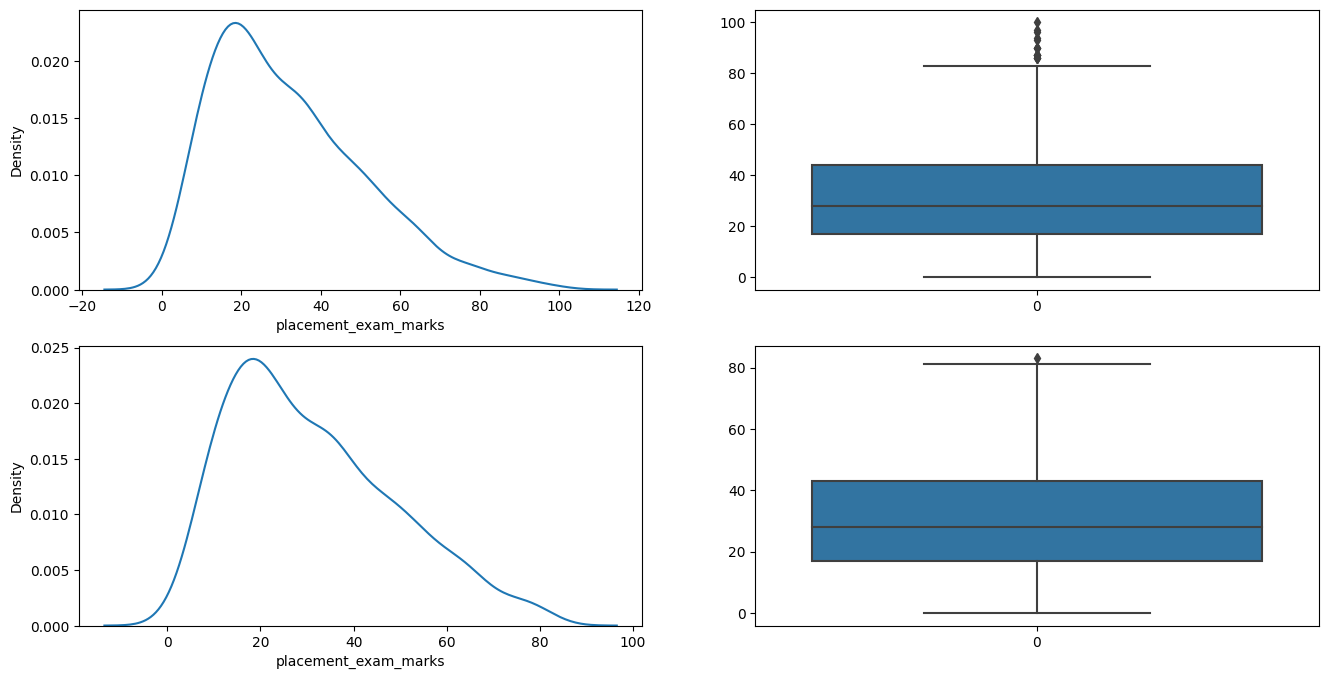

In [16]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.kdeplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

### <b style="color:red">Capping</b>

In [19]:
new_df_cap = df.copy()
# np.where(condtion,true,false)
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)
new_df_cap.shape

(1000, 3)

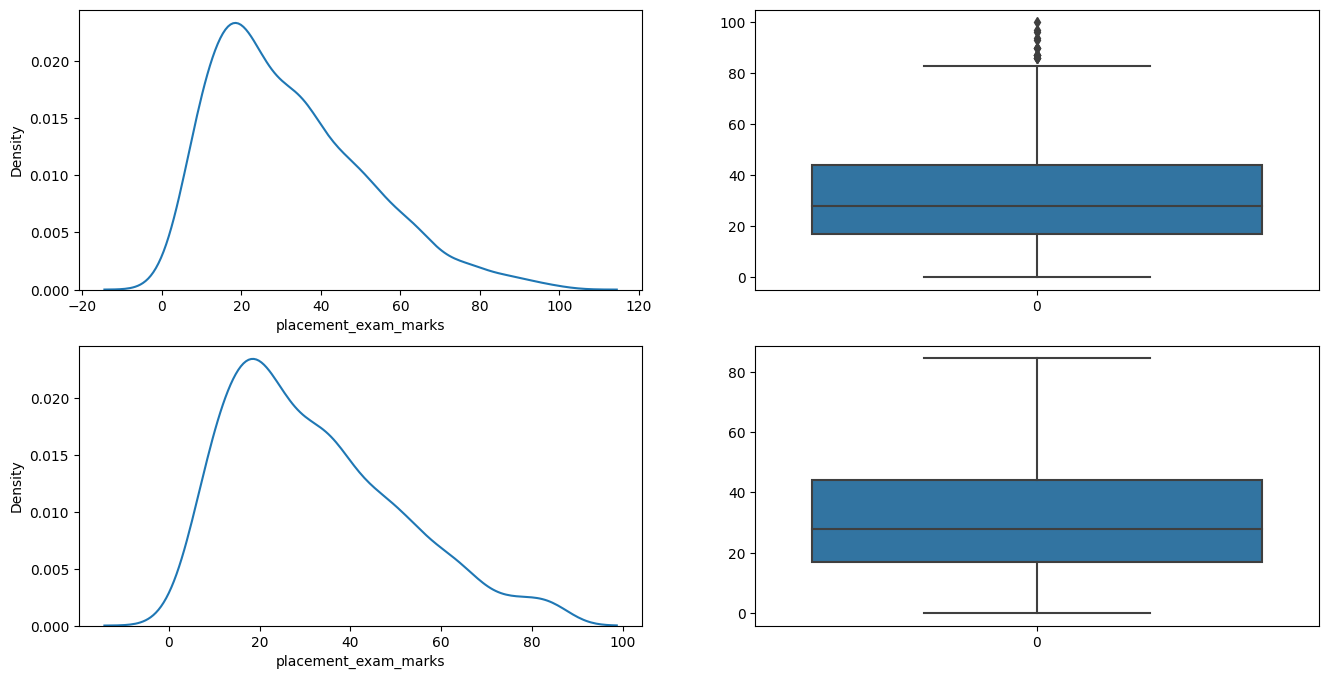

In [21]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.kdeplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()